In this notebook I am analyzing vehicles.csv data file. The CRISP-DM Data Science method consists of the following steps- Business understanding, Data cleaning,EDA, Pre-processing and training, Modeling,Valuation,Deployment. 
In this notebook, I may not be able to implement all the 6 steps -  I will try to understand and analyse the data , perform EDA and recommend suitable modeling techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
#Let's load the data
vehicle_data = pd.read_csv('/Users/jisasv1/Desktop/homework/vehicles.csv')

/Users/jisasv1/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (73,74,76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
vehicle_data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


#### Exploring the data 

In [4]:
vehicle_data.info

<bound method DataFrame.info of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
40076  14.982273         0.0        0.0        0.0      19      0.0        0   
40077  14.330870         0.0        0.0        0.0      20      0.0        0   
40078  15.695714         0.0        0.0        0.0      18      0.0        0   
40079  15.695714         0.0        0.0        0.0      18      0.0        0   
40080  18.311667         0.0        0.0        0.0      16      0.0        0   

       

In [5]:
vehicle_data.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [6]:
vehicle_data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,40081.000000,40081.000000,40081.0,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,...,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000
mean,17.363564,0.220069,0.0,0.036086,18.213318,5.494777,0.616077,0.466164,0.000471,0.274113,...,22.981798,0.789437,34.105932,1.076877,2001.068586,-4134.565006,0.007497,0.122851,0.123375,0.122527
std,4.597119,1.143270,0.0,0.534894,7.397433,11.027993,4.739349,4.563736,0.039282,3.513989,...,10.473444,6.612445,10.790921,7.205627,10.908967,3256.499139,0.195365,2.599224,2.510273,2.542274
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-29000.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.110500,0.000000,27.661300,0.000000,1991.000000,-5750.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.296500,0.000000,33.024600,0.000000,2002.000000,-4000.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,0.000000,0.0,0.000000,20.000000,12.273600,0.000000,0.000000,0.000000,0.000000,...,25.700000,0.000000,38.839200,0.000000,2011.000000,-2000.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,182.700000,173.143600,2019.000000,5250.000000,8.500000,97.000000,81.000000,88.000000


The describe method describes some basic statistical facts about the dataset - like mean, min, max, percentile etc.
Here we can see that our variable of interest 'Ucity' has a mean of 22.98 mpg, 25% have 18.11 mpg, 50% have 21.29 mpg and 75% have 25.7% mpg.

In [7]:
vehicle_data.mpgData

0        Y
1        N
2        Y
3        N
4        N
        ..
40076    N
40077    N
40078    Y
40079    Y
40080    N
Name: mpgData, Length: 40081, dtype: object

In [8]:
vehicle_data.UCity

0        23.3333
1        11.0000
2        29.0000
3        12.2222
4        21.0000
          ...   
40076    24.0000
40077    25.0000
40078    23.0000
40079    23.0000
40080    20.0000
Name: UCity, Length: 40081, dtype: float64

In [9]:
vehicle_data.make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
40076        Subaru
40077        Subaru
40078        Subaru
40079        Subaru
40080        Subaru
Name: make, Length: 40081, dtype: object

In [10]:
vehicle_data['make']. unique()

array(['Alfa Romeo', 'Ferrari', 'Dodge', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'CX Automotive', 'Nissan', 'Ford', 'Hyundai',
       'Infiniti', 'Lexus', 'Mercury', 'Mazda', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Rolls-Royce', 'Eagle', 'Lincoln', 'Mercedes-Benz',
       'GMC', 'Saab', 'Honda', 'Saturn', 'Mitsubishi', 'Isuzu', 'Jeep',
       'AM General', 'Geo', 'Suzuki', 'E. P. Dutton, Inc.', 'Land Rover',
       'PAS, Inc', 'Acura', 'Jaguar', 'Lotus', 'Grumman Olson', 'Porsche',
       'American Motors Corporation', 'Kia', 'Lamborghini',
       'Panoz Auto-Development', 'Maserati', 'Saleen', 'Aston Martin',
       'Dabryan Coach Builders Inc', 'Federal Coach', 'Vector', 'Bentley',
       'Daewoo', 'Qvale', 'Roush Performance', 'Autokraft Limited',
       'Bertone', 'Panther Car Company Limited', 'Texas Coach Company',
       'TVR Engineering Ltd', 'Morgan', 'MINI', 'Yugo', 'BMW Alpina',
       'Renaul

In [11]:
vehicle_data.model

0         Spider Veloce 2000
1                 Testarossa
2                    Charger
3        B150/B250 Wagon 2WD
4           Legacy AWD Turbo
                ...         
40076                 Legacy
40077                 Legacy
40078             Legacy AWD
40079             Legacy AWD
40080       Legacy AWD Turbo
Name: model, Length: 40081, dtype: object

In [12]:
vehicle_data['model'].unique()

array(['Spider Veloce 2000', 'Testarossa', 'Charger', ...,
       'Ferrari 348 TB/TS', 'XJRS Convertble', 'XJRS Coupe'], dtype=object)

Let's also find out the number and percentage of missing values in each column

In [13]:
#Calculate missing values in each column
missing = pd.concat([vehicle_data.isnull().sum(), 100 * vehicle_data.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count',ascending=False) 

,count,%
c240bDscr,40018,99.842818
c240Dscr,40016,99.837828
evMotor,39345,98.163718
sCharger,39285,98.014022
rangeA,38539,96.152791
...,...,...
fuelCostA08,0,0.000000
fuelCost08,0,0.000000
feScore,0,0.000000
engId,0,0.000000


We can see that some columns have more than 95% data missing. It would be better to drop these columns. 
As a rule of thumb, it is better to remove columns that have 60-70 percent missing values. 
Here I am going to remove all columns that has more than 75% values missing

In [14]:
missing.sort_values(by='count',ascending=False).head(20)

,count,%
c240bDscr,40018,99.842818
c240Dscr,40016,99.837828
evMotor,39345,98.163718
sCharger,39285,98.014022
rangeA,38539,96.152791
fuelType2,38534,96.140316
guzzler,37704,94.069509
atvType,36707,91.582046
tCharger,33779,84.276839
startStop,31704,79.099823


##### Cleaning

In [15]:
#Drop all columns which have 70% or more nAN values
perc = 70.0
min_count =  int(((100-perc)/100)*vehicle_data.shape[0] + 1)
vehicle_data = vehicle_data.dropna( axis=1, thresh=min_count)
vehicle_data

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,VClass,year,youSaveSpend,trans_dscr,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,Two Seaters,1985,-2250,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,Two Seaters,1985,-11500,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,Subcompact Cars,1985,0,SIL,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,Vans,1985,-11500,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,Compact Cars,1993,-5750,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40076,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,Compact Cars,1993,-2000,CLKUP,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
40077,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,Compact Cars,1993,-1500,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
40078,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,Compact Cars,1993,-2250,CLKUP,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
40079,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,Compact Cars,1993,-2250,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


As a result, 10 columns are dropped. We can see that the dataframe now contains only 72 columns.

In [16]:
vehicle_data = vehicle_data.drop(['trans_dscr'], axis=1)

eng_dscr also has 39% missing values. 
Let's fill up all the NANs of remainig columns.

In [17]:
vehicle_data['eng_dscr']

0             (FFS)
1         (GUZZLER)
2             (FFS)
3               NaN
4        (FFS,TRBO)
            ...    
40076         (FFS)
40077         (FFS)
40078         (FFS)
40079         (FFS)
40080    (FFS,TRBO)
Name: eng_dscr, Length: 40081, dtype: object

In [18]:
vehicle_data['eng_dscr']= vehicle_data['eng_dscr'].fillna('Unknown')

In [19]:
vehicle_data['drive']

0                  Rear-Wheel Drive
1                  Rear-Wheel Drive
2                 Front-Wheel Drive
3                  Rear-Wheel Drive
4        4-Wheel or All-Wheel Drive
                    ...            
40076             Front-Wheel Drive
40077             Front-Wheel Drive
40078    4-Wheel or All-Wheel Drive
40079    4-Wheel or All-Wheel Drive
40080    4-Wheel or All-Wheel Drive
Name: drive, Length: 40081, dtype: object

In [20]:
vehicle_data['drive']= vehicle_data['drive'].fillna('Unknown')

In [21]:
vehicle_data['cylinders'] 

0         4.0
1        12.0
2         4.0
3         8.0
4         4.0
         ... 
40076     4.0
40077     4.0
40078     4.0
40079     4.0
40080     4.0
Name: cylinders, Length: 40081, dtype: float64

In [22]:
vehicle_data['cylinders'] = vehicle_data['cylinders'].fillna(vehicle_data['cylinders'].mode()[0])


In [23]:
vehicle_data['displ']

0        2.0
1        4.9
2        2.2
3        5.2
4        2.2
        ... 
40076    2.2
40077    2.2
40078    2.2
40079    2.2
40080    2.2
Name: displ, Length: 40081, dtype: float64

In [24]:
vehicle_data['displ']= vehicle_data['drive'].fillna(0)

In [25]:
vehicle_data['trany']

0           Manual 5-spd
1           Manual 5-spd
2           Manual 5-spd
3        Automatic 3-spd
4           Manual 5-spd
              ...       
40076    Automatic 4-spd
40077       Manual 5-spd
40078    Automatic 4-spd
40079       Manual 5-spd
40080    Automatic 4-spd
Name: trany, Length: 40081, dtype: object

In [26]:
vehicle_data['trany']= vehicle_data['drive'].fillna('Unknown')

In [27]:
vehicle_data.isna().sum()

barrels08     0
barrelsA08    0
charge120     0
charge240     0
city08        0
             ..
createdOn     0
modifiedOn    0
phevCity      0
phevHwy       0
phevComb      0
Length: 71, dtype: int64

#### EDA- Visualization

Let's visualize the mpg for each car 'make'

<BarContainer object of 40081 artists>

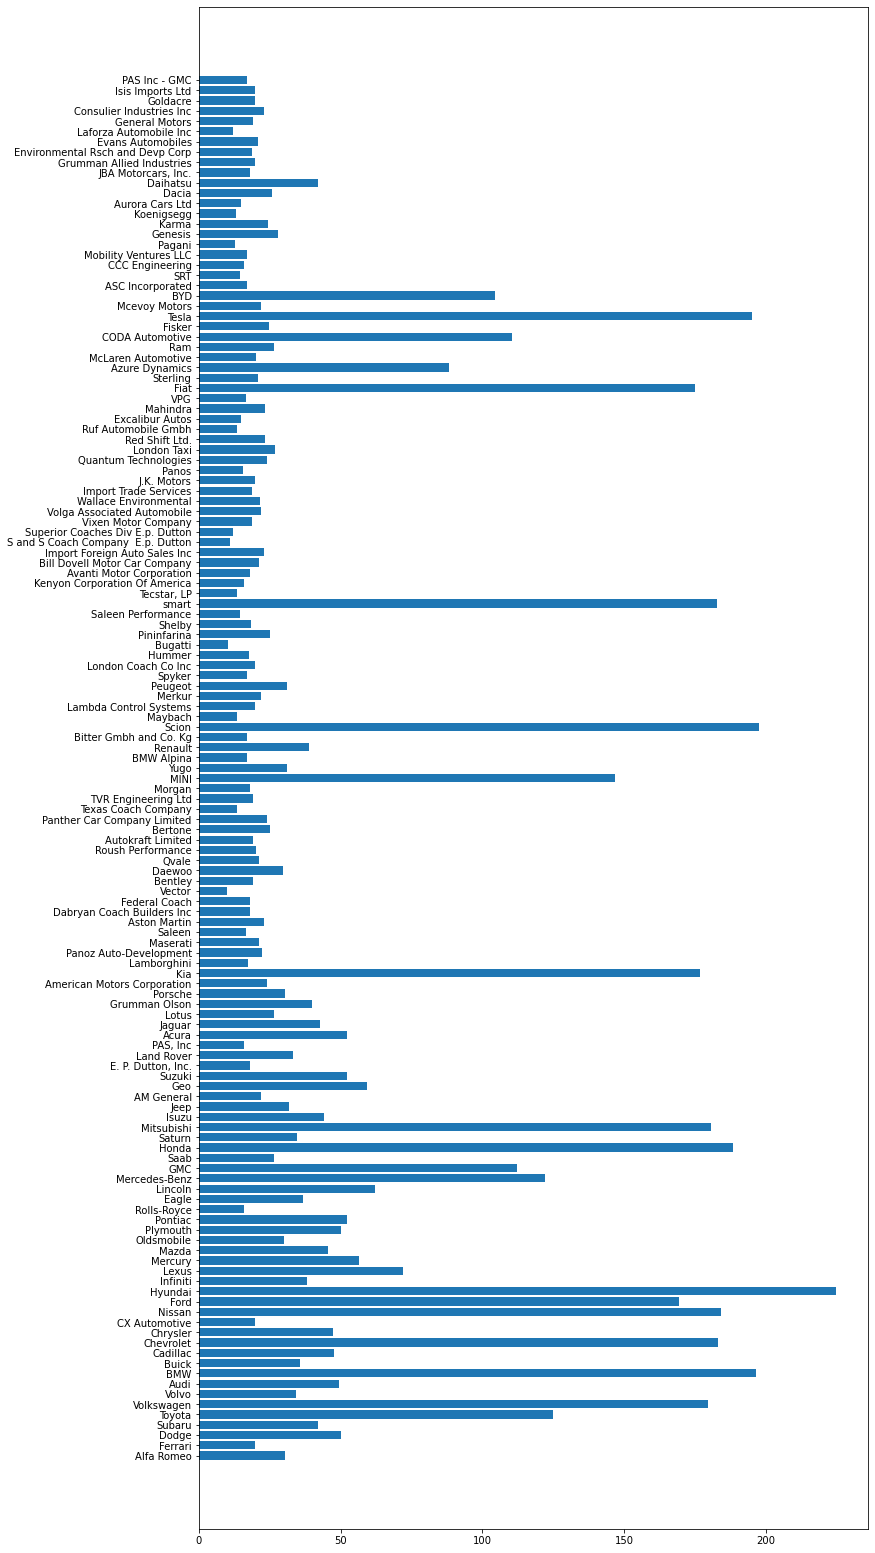

In [28]:
#Plotting a horizontal bar graph. 
plt.figure(figsize=(12,28))
plt.barh(vehicle_data['make'], vehicle_data['UCity'])

Wow!Some car makes have a very high mpg and some very low. Hyundai has the highest citypmg, followed by Scion and Tesla.

Let's try to undersand if there is any correlation between 'make'and mpg 'Ucity'. 

<AxesSubplot:xlabel='make', ylabel='UCity'>

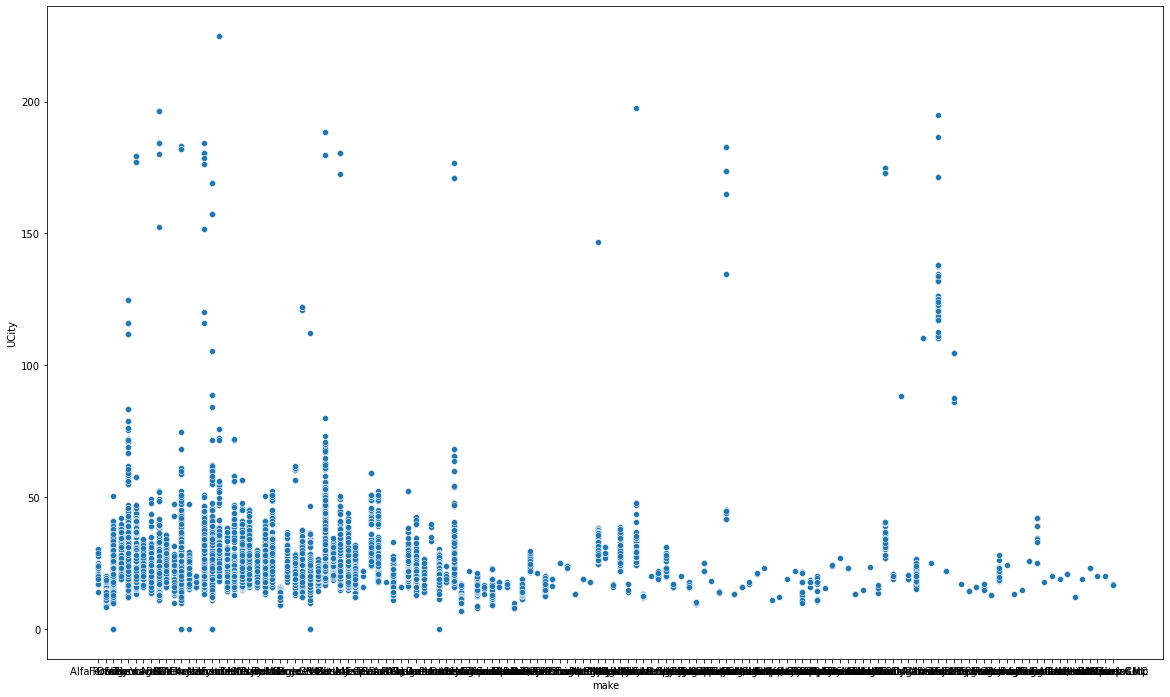

In [29]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='make', y='UCity', data=vehicle_data)

In [30]:
vehicle_data['make'].nunique()

135

There are 135 types of car 'make'. Its quite difficult to display all those in this plot. So we are not able to visualize or read anything using this scatterplot. However, According to this graph, there is no correlation between 'make' and 'Ucity'.

<AxesSubplot:xlabel='model', ylabel='UCity'>

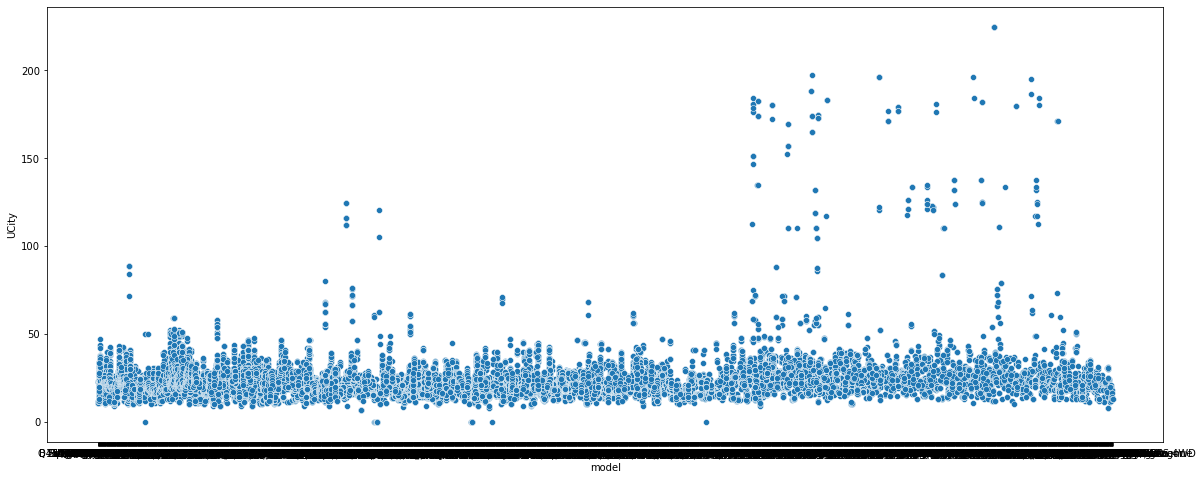

In [31]:
#Let's try visualizing the car model and mpg(UCity)
plt.figure(figsize=(20,8))
sns.scatterplot(x='model', y='UCity', data=vehicle_data)

In [32]:
vehicle_data['model'].nunique()

3960

There are 3960 car models!! Thats' why we are not able to read this graph. Let's try some other visualizations.

<AxesSubplot:xlabel='eng_dscr', ylabel='UCity'>

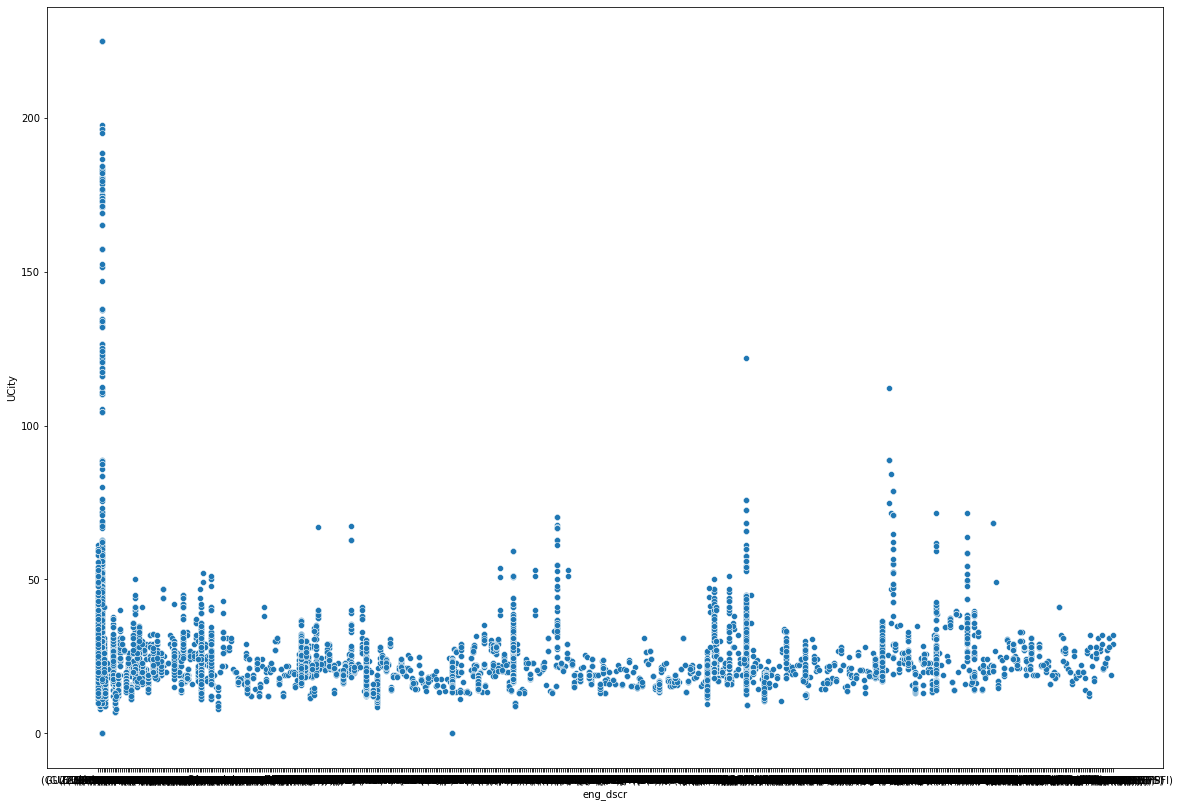

In [33]:
plt.figure(figsize=(20,14))
sns.scatterplot(x='eng_dscr', y='UCity', data=vehicle_data)

#### Statistical Analysis

In [35]:
#Let's do some groupby and aggregation. 
# I am trying to find the average city mpg for each car 'make'
Avgmpg_perMake = vehicle_data.groupby('make')['UCity'].mean().sort_values(ascending=False)
Avgmpg_perMake

make
Tesla                                 127.505172
CODA Automotive                       110.300000
BYD                                    95.778233
smart                                  92.472678
Azure Dynamics                         88.400000
                                         ...    
Superior Coaches Div E.p. Dutton       12.000000
Laforza Automobile Inc                 12.000000
S and S Coach Company  E.p. Dutton     11.000000
Bugatti                                 9.866667
Vector                                  8.722225
Name: UCity, Length: 135, dtype: float64

According to our calculation, Tesla has the highest average city mpg of 127.5 mpg, followed by CODA Automotive at 110.3 and BYD at 95.7 mpg.

In [40]:
#To find out average city mpg per car 'model' 
Avgmpg_perModel = vehicle_data.groupby('model')['UCity'].mean().sort_values(ascending=False)
Avgmpg_perModel

model
Ioniq Electric                      224.8000
iQ EV                               197.5771
i3 BEV                              196.4000
i3 BEV (60  Amp-hour battery)       196.4000
Model 3 Long Range                  190.8500
                                      ...   
Savana Passenger (Bi-fuel)            0.0000
Express Cargo (dedicated CNG)         0.0000
Savana Cargo (dedicated CNG)          0.0000
Savana Passenger (dedicated CNG)      0.0000
Express Cargo (Bi-fuel)               0.0000
Name: UCity, Length: 3960, dtype: float64

Correlation heatmap is a great way to gain a high level view of relationships amongst the features.

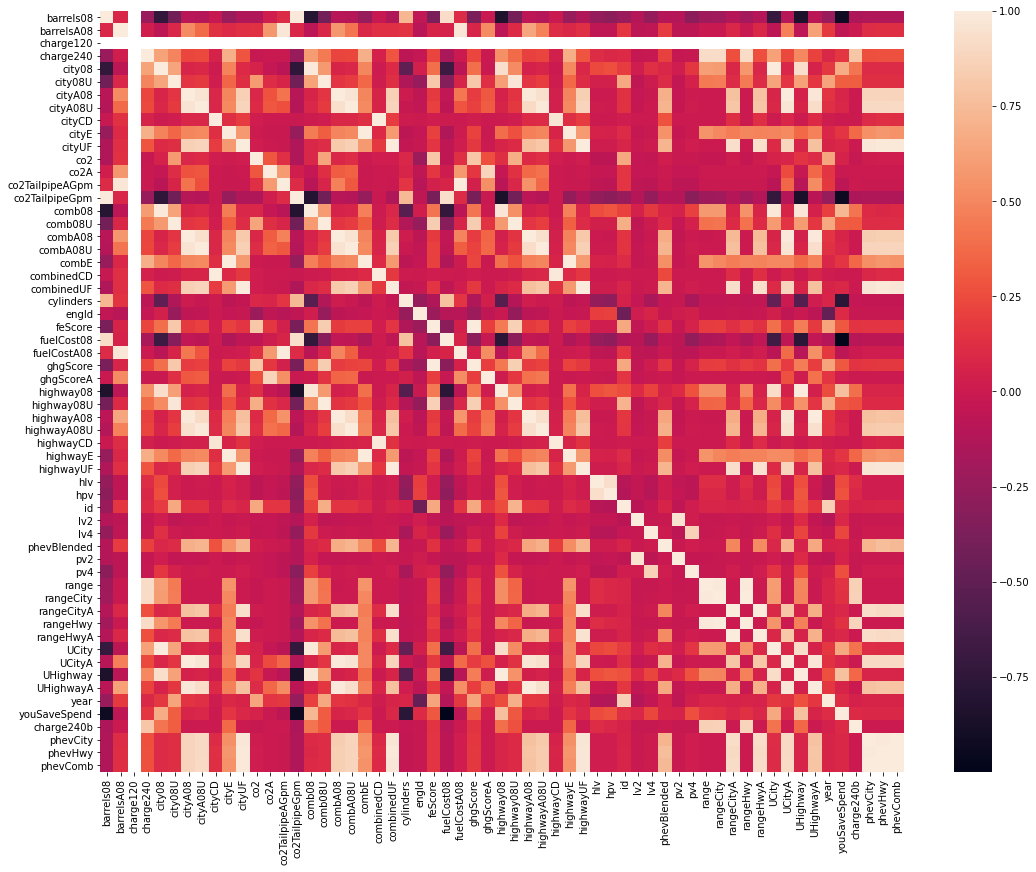

In [43]:
plt.subplots(figsize=(18,14))
sns.heatmap(vehicle_data.corr());

From the correlation map, we can visualize that UCity and barrelas08 are negatively correlated, UCity and CO2TailpipeGpm and UCity and cylinders, UcIty and FuelCost08 are also negatively correlated. 
 We can also infer that UcITY and city08, UCity and highway08, UCity and comb08, are positively correlated. They have very good correlation. UCity and year have around 0.20 positive correlation. So we can infer that mpg is not entirely dependant on 'year'

##### Pre-processing and Training

In [44]:
vehicle_data.info

<bound method DataFrame.info of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
40076  14.982273         0.0        0.0        0.0      19      0.0        0   
40077  14.330870         0.0        0.0        0.0      20      0.0        0   
40078  15.695714         0.0        0.0        0.0      18      0.0        0   
40079  15.695714         0.0        0.0        0.0      18      0.0        0   
40080  18.311667         0.0        0.0        0.0      16      0.0        0   

       

There are 71 columns in the vehicle dataset. 
Among these 71 columns, we have to identify all categorical columns and create dummy values for them 

In [45]:
vehicle_data.select_dtypes('object')

,displ,drive,eng_dscr,fuelType,fuelType1,make,model,mpgData,trany,VClass,createdOn,modifiedOn
0,Rear-Wheel Drive,Rear-Wheel Drive,(FFS),Regular,Regular Gasoline,Alfa Romeo,Spider Veloce 2000,Y,Rear-Wheel Drive,Two Seaters,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,Rear-Wheel Drive,(GUZZLER),Regular,Regular Gasoline,Ferrari,Testarossa,N,Rear-Wheel Drive,Two Seaters,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Dodge,Charger,Y,Front-Wheel Drive,Subcompact Cars,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,Rear-Wheel Drive,Unknown,Regular,Regular Gasoline,Dodge,B150/B250 Wagon 2WD,N,Rear-Wheel Drive,Vans,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Premium,Premium Gasoline,Subaru,Legacy AWD Turbo,N,4-Wheel or All-Wheel Drive,Compact Cars,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
...,...,...,...,...,...,...,...,...,...,...,...,...
40076,Front-Wheel Drive,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Subaru,Legacy,N,Front-Wheel Drive,Compact Cars,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
40077,Front-Wheel Drive,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Subaru,Legacy,N,Front-Wheel Drive,Compact Cars,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
40078,4-Wheel or All-Wheel Drive,4-Wheel or All-Wheel Drive,(FFS),Regular,Regular Gasoline,Subaru,Legacy AWD,Y,4-Wheel or All-Wheel Drive,Compact Cars,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
40079,4-Wheel or All-Wheel Drive,4-Wheel or All-Wheel Drive,(FFS),Regular,Regular Gasoline,Subaru,Legacy AWD,Y,4-Wheel or All-Wheel Drive,Compact Cars,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


In [60]:
#Make a variable called 'categorical', and a list containing all Categorical(object) types columns
categorical = ['displ','drive','eng_dscr','fuelType','fuelType1','make','model','mpgData','trany','VClass','createdOn','modifiedOn','year']

In [61]:
X_cat = vehicle_data[categorical]
#Creating dummy values for categorical columns
X_cat= pd.get_dummies(X_cat)   
X_cat

,year,displ_2-Wheel Drive,displ_4-Wheel Drive,displ_4-Wheel or All-Wheel Drive,displ_All-Wheel Drive,displ_Automatic (A1),displ_Front-Wheel Drive,displ_Part-time 4-Wheel Drive,displ_Rear-Wheel Drive,displ_Unknown,...,modifiedOn_Wed May 04 00:00:00 EDT 2016,modifiedOn_Wed May 16 00:00:00 EDT 2018,modifiedOn_Wed May 18 00:00:00 EDT 2016,modifiedOn_Wed May 24 00:00:00 EDT 2017,modifiedOn_Wed Oct 05 00:00:00 EDT 2016,modifiedOn_Wed Oct 11 00:00:00 EDT 2017,modifiedOn_Wed Oct 12 00:00:00 EDT 2016,modifiedOn_Wed Oct 19 00:00:00 EDT 2016,modifiedOn_Wed Oct 26 00:00:00 EDT 2016,modifiedOn_Wed Sep 27 00:00:00 EDT 2017
0,1985,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1985,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1985,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1985,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1993,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40076,1993,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40077,1993,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40078,1993,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40079,1993,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Creating a dependent variable called y, and assign it the column which we have to predict
y= vehicle_data.UCity

In [63]:
#Creating a variable called numerical and a list containing all Numerical columns
X_numerical= vehicle_data.drop(['displ','drive','eng_dscr','fuelType','fuelType1','make','model','mpgData','trany','VClass','createdOn','modifiedOn','year'], axis=1)
X_numerical

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,23.3333,0.0,35.0000,0.0,-2250,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,11.0000,0.0,19.0000,0.0,-11500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,29.0000,0.0,47.0000,0.0,0,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,12.2222,0.0,16.6667,0.0,-11500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,21.0000,0.0,32.0000,0.0,-5750,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40076,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,24.0000,0.0,37.0000,0.0,-2000,0.0,0,0,0
40077,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,0.0,25.0000,0.0,39.0000,0.0,-1500,0.0,0,0,0
40078,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0.0,23.0000,0.0,34.0000,0.0,-2250,0.0,0,0,0
40079,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0.0,23.0000,0.0,34.0000,0.0,-2250,0.0,0,0,0


#Scaling the numerical data 

In [65]:
from sklearn import preprocessing
import numpy as np
#build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_numerical)
X_numerical_scaled=scaler.transform(X_numerical)
#X_test_scaled=scaler.transform(X_test)

In [70]:
X_numerical_scaled.dtype

dtype('float64')

In [74]:
X_num = pd.DataFrame(X_numerical_scaled)

In [79]:
X = pd.concat([X_num, X_cat],axis=1)

In [80]:
#Call train_test_split on X, y. the test_size = 0.25, and random_state = 123
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                 test_size = 0.25,
                                                 random_state = 123)

#### Modeling

Now that our dataset is pre-procesed and trained we can implement Modeling. When we have to predict a value(a continous variable), Regression models is what we have to use.

I will try 2-3 types of Regression models on the vehicle_data dataset to predict city mpg -UCity.

In [81]:
#RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 123, n_jobs= -1)
model = rfr.fit(X_train, y_train)

In [82]:
#measuring the accuracy of the model against the training data.
model.score(X_train, y_train)

0.9999587837224424

In [84]:
y_pred = model.predict(X_test)
y_pred

array([16.5     , 17.8     , 18.8889  , ..., 14.      , 20.759071,
       20.      ])

In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('RMSE is: \n', np.sqrt(mse)) #RMSE WORKS mostly on all regression models

RMSE is: 
 0.08865797676086806


Text(0, 0.5, 'predicted city mpg')

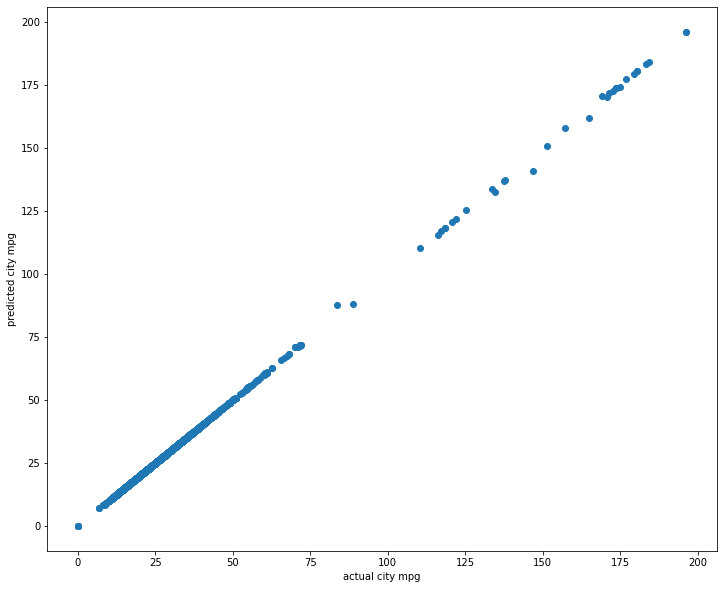

In [86]:
#Checking if there is any correlation between actual sales and predicted sales
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred)
plt.xlabel('actual city mpg')
plt.ylabel('predicted city mpg')

There is a great correlation between the actual and predicted values and the Random Forest Regressor model has a very good RMSE.

In [87]:
#The second regression model I am trying is XGBoost Regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
reg = GradientBoostingRegressor(random_state=0)
xgModel = reg.fit(X_train, y_train)

In [89]:
xgModel.score(X_train, y_train)

0.9999023559533398

In [90]:
# The predicted y values
y_pred = xgModel.predict(X_test)
y_pred

array([16.57093142, 17.58408431, 18.89658716, ..., 14.00422991,
       20.74736043, 20.01353108])

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('RMSE is: \n', np.sqrt(mse)) #RMSE WORKS mostly on all regression models

RMSE is: 
 0.1304214802441299


Text(0, 0.5, 'predicted city mpg')

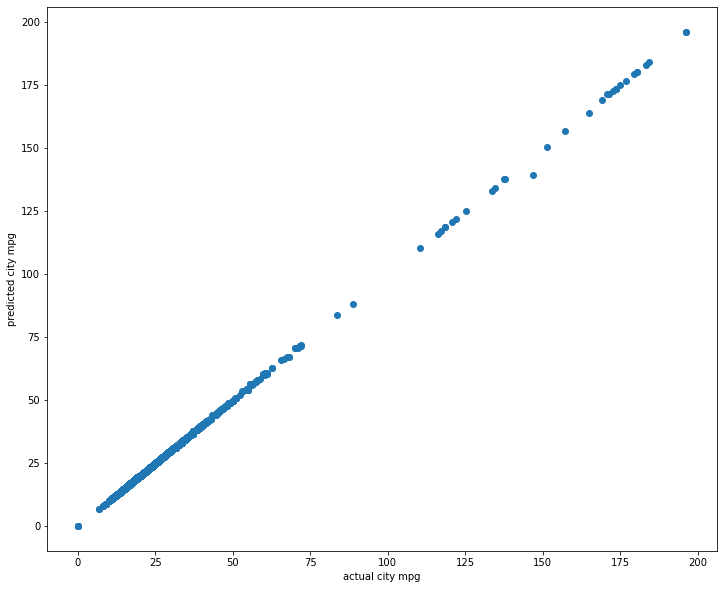

In [92]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred)
plt.xlabel('actual city mpg')
plt.ylabel('predicted city mpg')

The XGBoost Regression also has given good predictions. There is a good correlation between actual and predicted city mpg. It has a slightly more RMSE than Random Forest Regressor, but neverthless a very good RMSE. So we can choose any model between these two. 

#### Conclusion and Future Work